<a href="https://colab.research.google.com/github/JinLeeGG/Grokking-the-Coding-Interview-Patterns-for-Coding-Questions/blob/main/Pattern%3A%20Two%20Pointers/15_3Sum(medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://leetcode.com/problems/3sum/description/

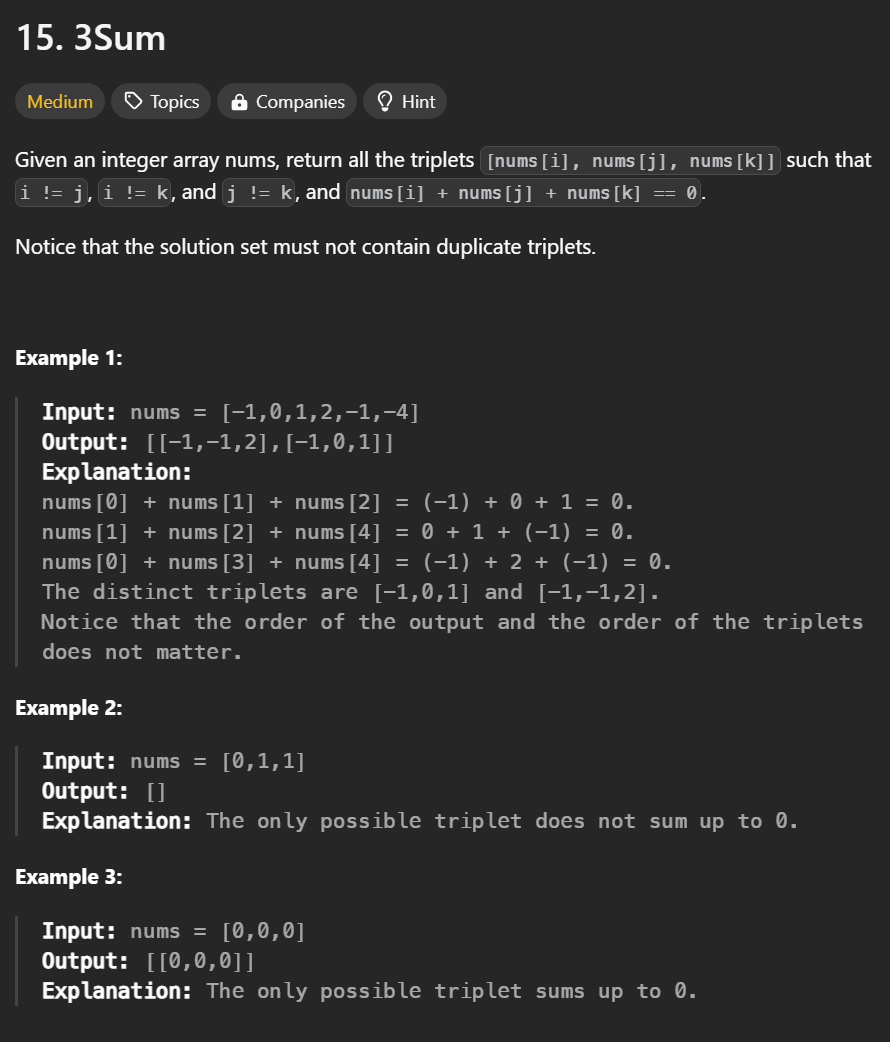

In [3]:
# Initial approach
class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        left = 1
        right = len(nums) - 1
        nums_with_index = [(num, i) for i, num in enumerate(nums)]
        nums_with_index.sort()
        result = []

        for i in range(len(nums)):
            if nums[i] + nums[left] + nums[right] == 0:
                result.append([i, left, right])
            else:
                left += 1
                right -= 1
        return result



s = Solution()
s.threeSum([-1,0,1,2,-1,-4])

[[1, 2, 4]]

In [5]:
# Answer 1 using 2 pointer
# O(n^2)

class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        result = []
        nums.sort()

        for i in range(len(nums)):
            # no same tripulates
            if i > 0 and nums[i] == nums[i-1]:
                continue

            left = i + 1
            right = len(nums) - 1

            while left < right:
                total = nums[i] + nums[left] + nums[right]

                if total > 0:
                    right -= 1
                elif total < 0:
                    left += 1
                else:
                    result.append([nums[i], nums[left], nums[right]])
                    left += 1

                    # possiblity that left is same as previous number:
                    # avoid duplicates
                    while nums[left] == nums[left - 1] and left < right:
                        left += 1

        return result

s = Solution()
s.threeSum([-1,0,1,2,-1,-4])

[[-1, -1, 2], [-1, 0, 1]]

In [6]:
class Solution:
  def searchTriplets(self, arr):
    arr.sort()
    triplets = []
    for i in range(len(arr)):
      if i > 0 and arr[i] == arr[i-1]:  # skip same element to avoid duplicate triplets
        continue
      self.searchPair(arr, -arr[i], i+1, triplets)

    return triplets


  def searchPair(self, arr, target_sum, left, triplets):
    right = len(arr) - 1
    while(left < right):
      current_sum = arr[left] + arr[right]
      if current_sum == target_sum:  # found the triplet
        triplets.append([-target_sum, arr[left], arr[right]])
        left += 1
        right -= 1
        while left < right and arr[left] == arr[left - 1]:
          left += 1  # skip same element to avoid duplicate triplets
        while left < right and arr[right] == arr[right + 1]:
          right -= 1  # skip same element to avoid duplicate triplets
      elif target_sum > current_sum:
        left += 1  # we need a pair with a bigger sum
      else:
        right -= 1  # we need a pair with a smaller sum

s = Solution()
s.searchTriplets([-1,0,1,2,-1,-4])

[[-1, -1, 2], [-1, 0, 1]]